1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

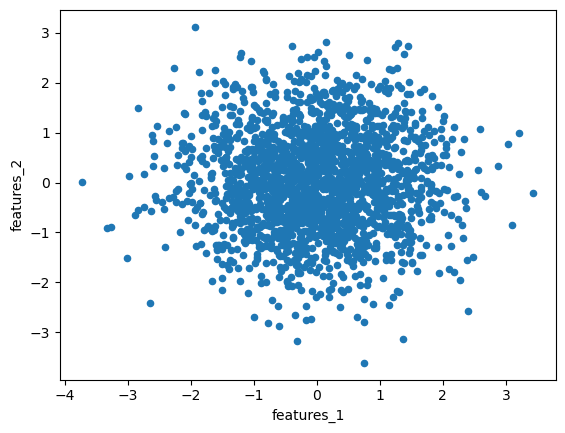

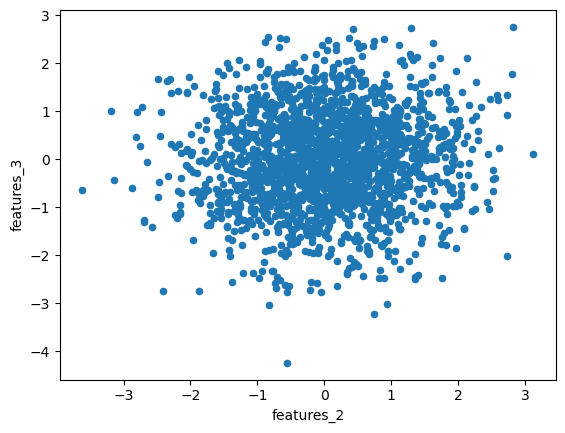

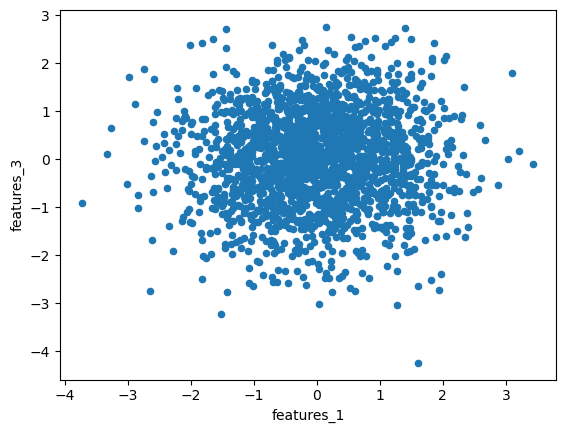

In [1]:
#DA FINIRE: 7.3 Manca l'ultima parte 

#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
import pandas as pd
import matplotlib.pyplot as plt

data_reg=pd.read_csv("regression_generated.csv")
#print(data_reg)

ax1 = data_reg.plot.scatter(x='features_1', y='features_2')
ax2 = data_reg.plot.scatter(x='features_2', y='features_3')
ax3 = data_reg.plot.scatter(x='features_1', y='features_3')

#No, features are not correlated. We can not identify a line that fit properly the two features.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

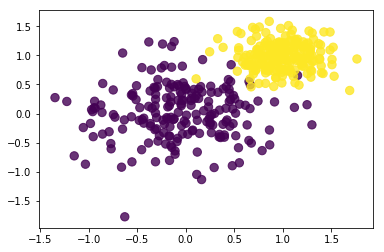

In [14]:
from IPython.display import Image
Image('2cp.png')

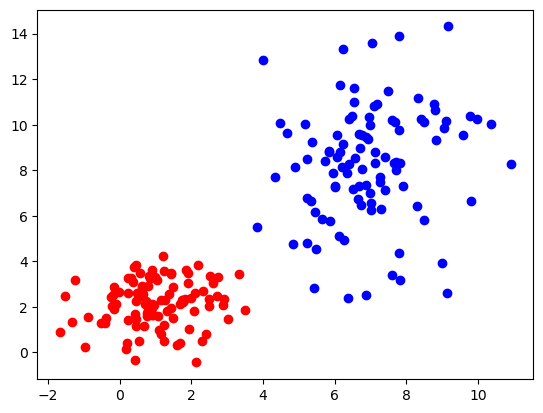

In [15]:
import numpy as np

#First gaussian distribution
mean = (1, 2)
cov = [[1, 0], [0, 1]]
cat1=np.random.multivariate_normal(mean, cov, 100)
x=[]
y=[]
for el in cat1:
    x.append(el[0])
    y.append(el[1])
plt.scatter(x, y, color = 'red')

#Second gaussian distribution
mean = (7, 8)
cov = [[2,0], [0, 6]]
cat2=np.random.multivariate_normal(mean, cov, 100)

x=[]
y=[]
for el in cat2:
    x.append(el[0])
    y.append(el[1])
plt.scatter(x, y, color = 'blue')

#Plot
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

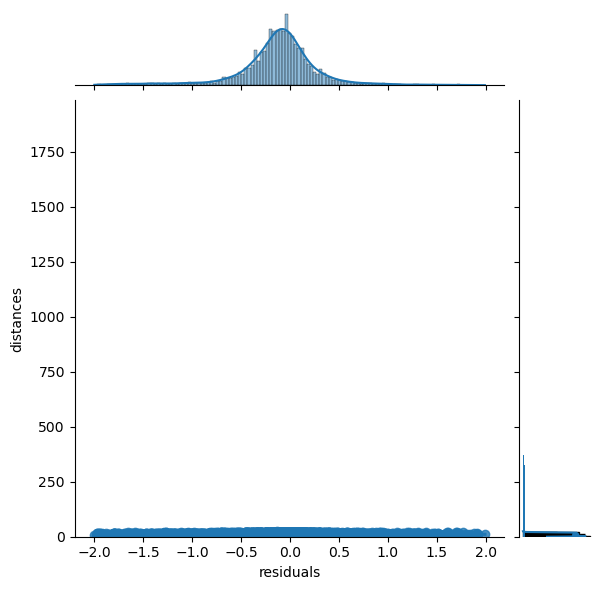

In [30]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

data="data/residuals_261.pkl"
df = pd.read_pickle(data)

df=dict(enumerate(df.flatten(),1))
d=pd.DataFrame(df)
c_1=pd.Series(d.loc['distances',1])
c_2=pd.Series(d.loc['residuals',1])
d=pd.DataFrame({'distances':c_1,'residuals':c_2})

d=d[abs(d['residuals'])<2]
sns.jointplot(data=d, x="residuals", y="distances",kind="reg")

dist=d.iloc[:,0:].values

#Qui viene estratta, dal df formato da due colonne, la colonna relativa a "distances"
#Successivamente viene calcolato il centro di ogni bin e i valori sono inseriti nell'array x
distances=[]
for el in dist:
    distances.append(el[0])
    
h, bins, _ = plt.hist(distances, bins=35)
x= 0.5 * (bins[:-1] + bins[1:])

#Qui viene estratta, dal df formato da due colonne, la colonna relativa a "residuals"
#Successivamente viene calcolato il valore di "altezza" di ogni bin e i valori sono inseriti nell'array y
residuals=[]
for el in dist:
    residuals.append(el[1])
    
h_1, bins_1, _ = plt.hist(residuals, bins=35)
y=h_1


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


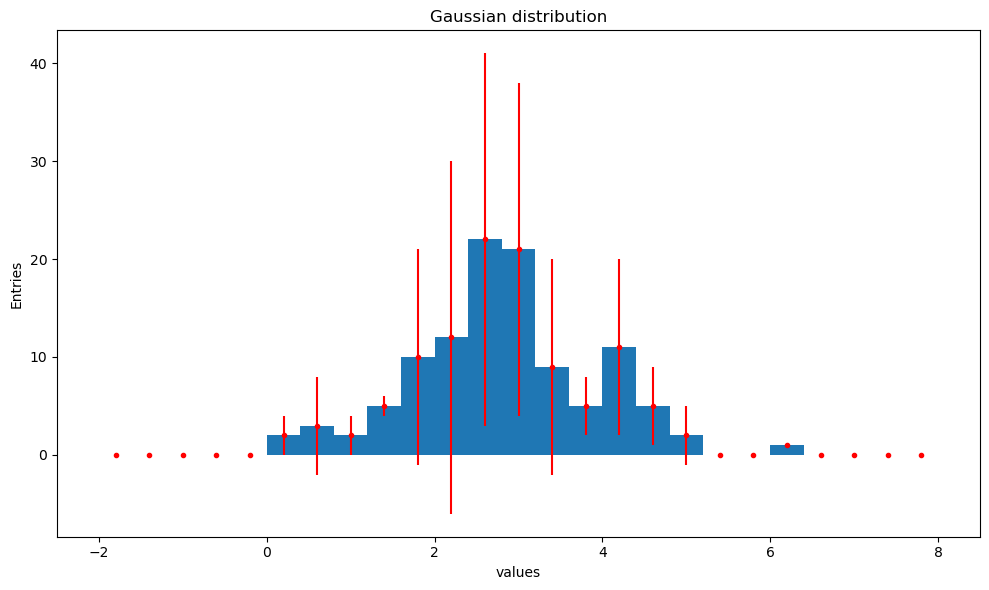

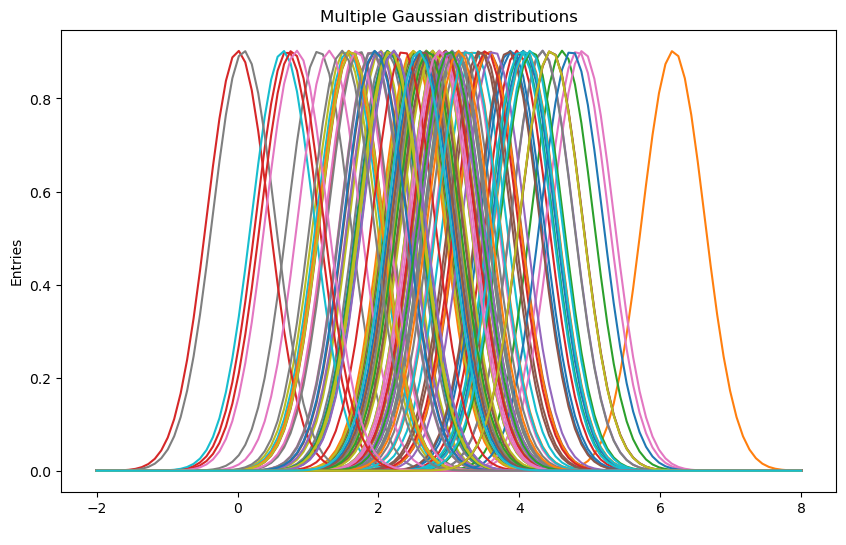

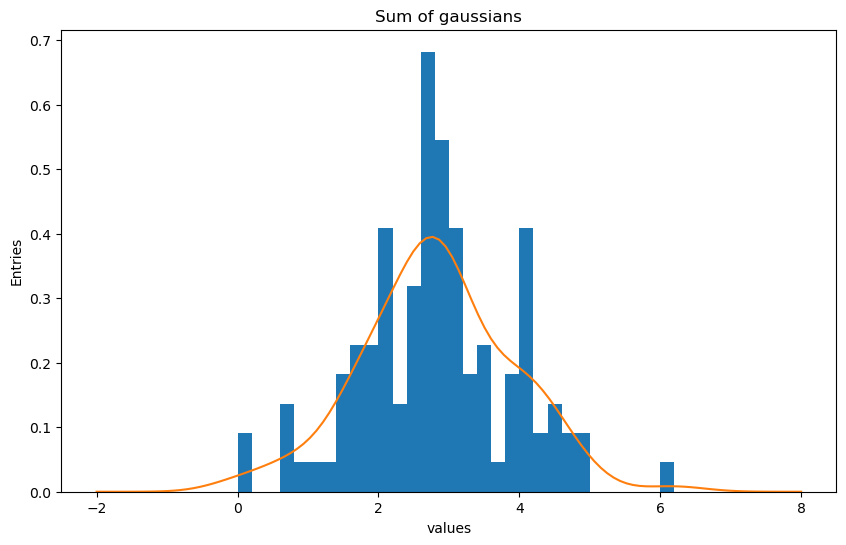

In [23]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

x=np.random.normal(3,1,110)
menStd     = np.sqrt(x)
fig = plt.figure(figsize=(10, 6)) 
#h, bins, _ = plt.hist(x, bins=25, range=(-2,8), density=True, cumulative=False)

#plt.bar(bincenters, y, width=width, color='r', yerr=menStd)
#plt.show()
entries, edges, _ = plt.hist(x, bins=25, range=(-2,8))
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.random.poisson(entries,25), fmt='r.')
ax = fig.axes[0]
ax.set_title('Gaussian distribution')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
fig.tight_layout()
plt.show()

cum=np.zeros(110)
a=[]
fig = plt.figure(figsize=(10, 6)) 
std=1.06*scipy.stats.tstd(x)*(110)**(-0.2)

for el in x:
    t =np.linspace(-2, 8, 110)
    a.append(scipy.stats.norm.pdf(t,el,std) )
    plt.plot(t,a[-1])
    
ax = fig.axes[0]
ax.set_title('Multiple Gaussian distributions')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
plt.show()

for val in a:
    for el in range(110):
        cum[el]=cum[el]+val[el]

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=50, range=(-2,8), density=True, cumulative=False)
plt.plot(t,cum/110) 
ax = fig.axes[0]
ax.set_title('Sum of gaussians')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
plt.show()


## 